
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊

def set_model():
    model = Sequential()

    #   第二步：構建網絡層

    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    return model

In [33]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [34]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
__________

In [ ]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


In [35]:
# 第三步：編譯, 
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [17]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 128
epochs = 3

In [18]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
 - 16s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 2/3
 - 16s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216
Epoch 3/3
 - 16s - loss: 2.8397 - acc: 0.8229 - val_loss: 2.8600 - val_acc: 0.8216


In [21]:
#    第六步：輸出
def output(model):
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
    print ( "" )
    #print ( " The test loss is %f " % scores)
    print ( " The test loss is %f ", scores)
    result = model.predict(X_test,batch_size=200,verbose= 0)

    result_max = numpy.argmax(result, axis = 1 )
    test_max = numpy.argmax(Y_test, axis = 1 )

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ( "" )
    print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

def plotfig(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
 - 12s - loss: 12.9408 - acc: 0.1969 - val_loss: 13.0158 - val_acc: 0.1924
Epoch 2/3
 - 10s - loss: 12.8281 - acc: 0.2041 - val_loss: 12.8802 - val_acc: 0.2008
Epoch 3/3
 - 10s - loss: 12.7617 - acc: 0.2082 - val_loss: 12.8775 - val_acc: 0.2011
 test set 

 The test loss is %f  [12.760699882507325, 0.20829999923706055]

 The accuracy of the model is 0.208300 


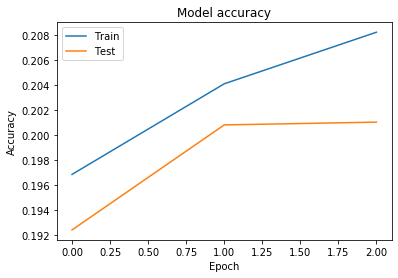

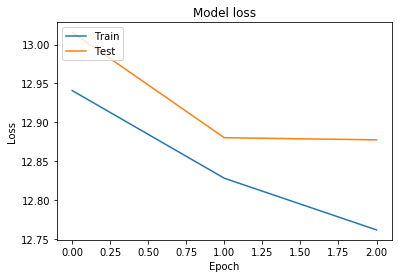

In [37]:
model = set_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 256
epochs = 3
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
output(model)
plotfig(history)

Train on 42000 samples, validate on 18000 samples
Epoch 1/6
 - 17s - loss: 14.4728 - acc: 0.1018 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 2/6
 - 14s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 3/6
 - 15s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 4/6
 - 15s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 5/6
 - 15s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 6/6
 - 15s - loss: 14.4802 - acc: 0.1016 - val_loss: 14.4499 - val_acc: 0.1035
 test set 

 The test loss is %f  [14.490172100067138, 0.10100000038743019]

 The accuracy of the model is 0.101000 


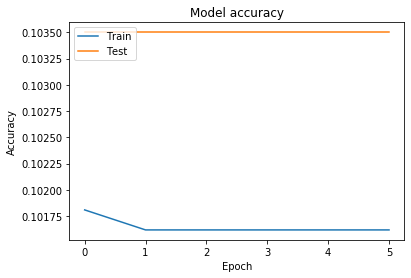

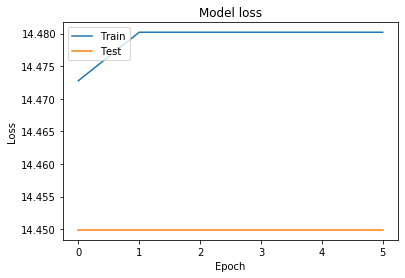

In [40]:
model = set_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 256
epochs = 6
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
output(model)
plotfig(history)

Train on 42000 samples, validate on 18000 samples
Epoch 1/6
 - 14s - loss: 14.4858 - acc: 0.1006 - val_loss: 14.5609 - val_acc: 0.0966
Epoch 2/6
 - 12s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5609 - val_acc: 0.0966
Epoch 3/6
 - 12s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5609 - val_acc: 0.0966
Epoch 4/6
 - 12s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5609 - val_acc: 0.0966
Epoch 5/6
 - 12s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5609 - val_acc: 0.0966
Epoch 6/6
 - 12s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5609 - val_acc: 0.0966
 test set 

 The test loss is %f  [14.49178394317627, 0.1009000001847744]

 The accuracy of the model is 0.100900 


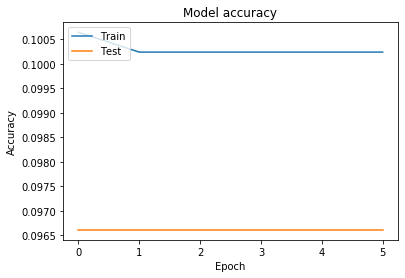

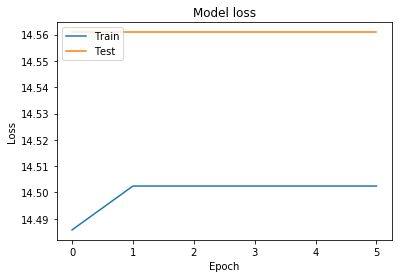

In [41]:
model = set_model()
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 256
epochs = 6
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
output(model)
plotfig(history)

Train on 42000 samples, validate on 18000 samples
Epoch 1/6
 - 15s - loss: 14.5000 - acc: 0.1001 - val_loss: 14.5607 - val_acc: 0.0966
Epoch 2/6
 - 14s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5607 - val_acc: 0.0966
Epoch 3/6
 - 14s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5607 - val_acc: 0.0966
Epoch 4/6
 - 13s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5607 - val_acc: 0.0966
Epoch 5/6
 - 14s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5607 - val_acc: 0.0966
Epoch 6/6
 - 14s - loss: 14.5025 - acc: 0.1002 - val_loss: 14.5607 - val_acc: 0.0966
 test set 

 The test loss is %f  [14.491224994659424, 0.1009000001847744]

 The accuracy of the model is 0.100900 


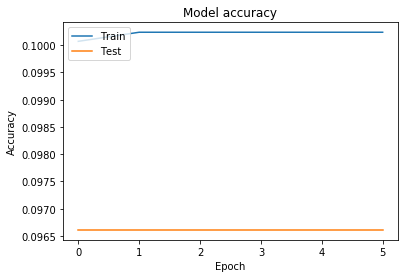

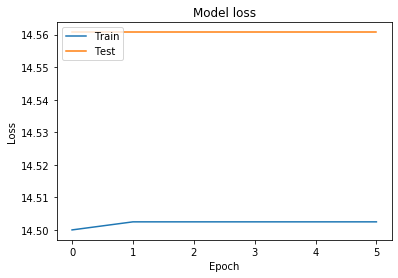

In [42]:
model = set_model()
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 256
epochs = 6
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
output(model)
plotfig(history)